In [1]:
import datetime
import os

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
df_load = pd.read_csv("BE_load_RAW20150101_20230116.csv", parse_dates=True, index_col=0)

df_price = pd.read_csv(
    "../Data/BE_price_RAW20150101_20230116.csv", parse_dates=True, index_col=0
)

df_cei = pd.read_csv(
    "../Data/BE_C0220150101_20230116.csv", parse_dates=True, index_col=0
)
df_cei.rename(columns={"Unnamed: 0": "Datetime"}, inplace=True)
df_cei.index = pd.to_datetime(df_cei.index, utc=True)
df_cei = df_cei.iloc[1:]

df_power = pd.read_csv(
    "../Data/BE_gen20150101_20230116.csv", parse_dates=True, index_col=0
)
df_power.rename(columns={"Unnamed: 0": "Datetime"}, inplace=True)
df_power.index = pd.to_datetime(df_power.index, utc=True)
df_power = df_power.iloc[1:]


df_weather = pd.read_csv(
    "../Data/POWER_Point_Hourly_20150101_20230121_050d8494N_004d3697E_LST.csv",
    parse_dates={"date": ["YEAR", "MO", "DY", "HR"]},
    skiprows=13,
    skipfooter=154,
    engine="python",
)

In [3]:
df = df_power.copy()
df["Temp"] = df_weather.T2M.values
df["PS"] = df_weather.PS.values
df["WS"] = df_weather.WS10M.values
df["HUM"] = df_weather.QV2M.values
df["CEI"] = df_cei["Carbon Intensity"]
df["Load"] = df_load["Actual Load"]
df["Price"] = df_price["0"]
df = df.drop(columns=["Renewables", "NonRenewables", "Total"])
df = df[df["Price"].notna()]
df

,Lignite,Gas,Coal,Oil,Nuclear,Other,Waste,Biomass,Geothermal,Hydro_storage,...,Solar,Wind_off,Wind_on,Temp,PS,WS,HUM,CEI,Load,Price
2015-01-04 23:00:00+00:00,0.0,1792.0,437.0,0.0,3904.0,602.0,269.0,231.0,0.0,0.0,...,0.0,49.0,242.0,-0.56,103.14,4.56,3.54,297.244248,10248.0,36.56
2015-01-05 00:00:00+00:00,0.0,1769.0,434.0,0.0,3905.0,573.0,266.0,231.0,0.0,0.0,...,0.0,72.0,283.0,-0.53,103.13,4.30,3.48,291.853613,9844.0,34.94
2015-01-05 01:00:00+00:00,0.0,1788.0,296.0,0.0,3905.0,548.0,267.0,232.0,0.0,0.0,...,0.0,136.0,251.0,-0.42,103.11,4.01,3.54,275.135559,9355.0,32.19
2015-01-05 02:00:00+00:00,0.0,1763.0,250.0,0.0,3904.0,501.0,268.0,234.0,0.0,0.0,...,0.0,206.0,310.0,-0.31,103.08,3.95,3.54,261.820238,9113.0,28.05
2015-01-05 03:00:00+00:00,0.0,1875.0,256.0,0.0,3903.0,498.0,269.0,227.0,0.0,0.0,...,0.0,213.0,318.0,-0.34,103.04,3.87,3.54,266.992756,9094.0,28.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-15 09:00:00+00:00,0.0,412.0,0.0,0.0,4901.0,0.0,104.0,121.0,0.0,0.0,...,755.0,2026.0,2143.0,5.73,99.64,10.31,4.82,43.355655,9153.0,26.24
2023-01-15 10:00:00+00:00,0.0,407.0,0.0,0.0,4901.0,0.0,106.0,119.0,0.0,274.0,...,1087.0,2041.0,2192.0,6.49,99.64,11.08,5.00,62.835100,9666.0,38.46
2023-01-15 11:00:00+00:00,0.0,406.0,0.0,0.0,4909.0,0.0,107.0,120.0,0.0,0.0,...,1081.0,1984.0,2234.0,6.67,99.62,12.28,5.07,42.791574,9757.0,38.86
2023-01-15 12:00:00+00:00,0.0,423.0,0.0,0.0,4901.0,0.0,105.0,122.0,0.0,0.0,...,848.0,2041.0,2293.0,6.65,99.57,11.97,5.13,43.464618,9743.0,28.63


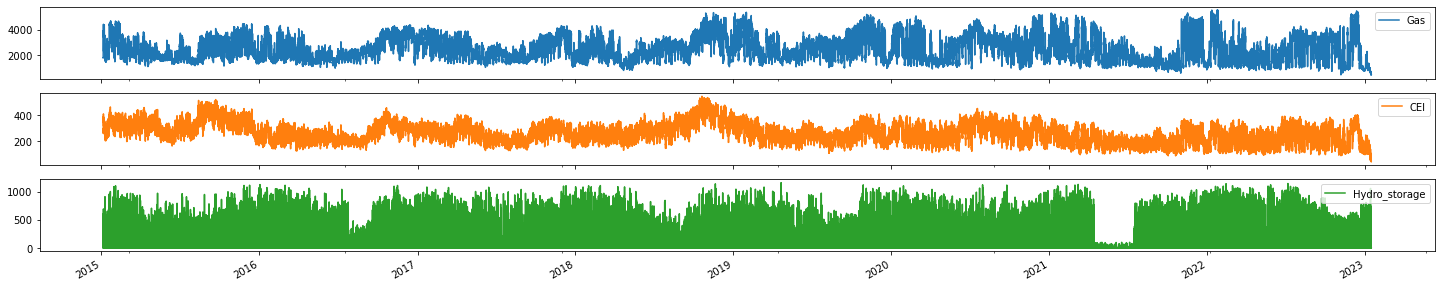

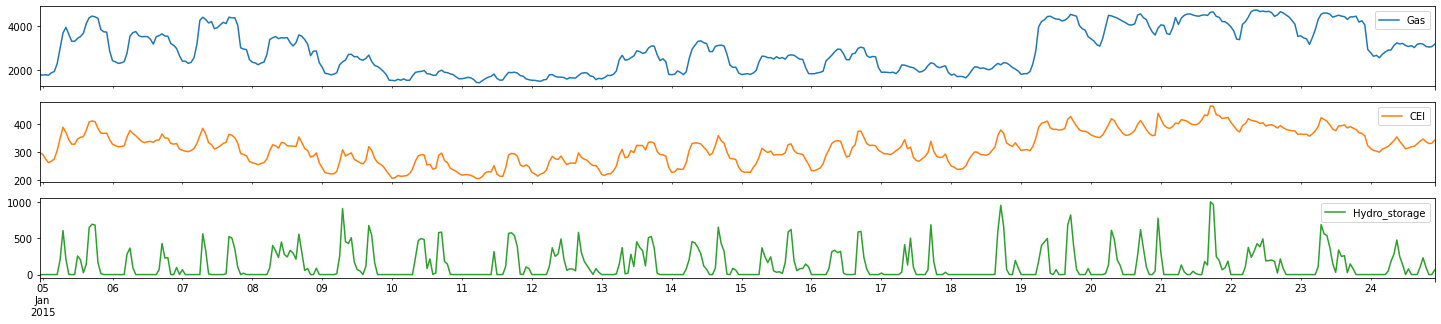

In [50]:
plot_cols = ['Gas', 'CEI', 'Hydro_storage']
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True, figsize=(25,5))

plot_features = df[plot_cols][:480]
plot_features.index = df.index[:480]
_ = plot_features.plot(subplots=True, figsize=(25,5))

In [10]:
df = df[df.Temp != -999]
df = df[df.Price != -500]
timestamp_s = df.index.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Daysin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Daycos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Yearsin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Yearcos'] = np.cos(timestamp_s * (2 * np.pi / year))

df = df[
    [  #'Lignite',
        "Gas",
        # "Coal",
        #"Oil",
        "Nuclear",
        "Other",
        "Waste",
        "Biomass",
        # 'Geothermal',
        "Hydro_storage",
        "Hydro",
        #'Hydro_res', 'Other_renew',
        "Solar",
        "Wind_off",
        "Wind_on",
        "Temp",
        "PS",
        "WS",
        "HUM",
        "CEI",
        "Load",
        #"Price",
        'Daysin',
        'Daycos',
        'Yearsin',
        'Yearcos'
        
    ]
].copy()
df
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gas,70309.0,2457.691064,989.643001,398.000000,1638.000000,2.287000e+03,3175.000000,5587.000000
Nuclear,70309.0,4247.614118,1176.552843,1005.000000,3460.000000,4.469000e+03,4983.000000,6018.000000
Other,70309.0,603.067417,146.788442,0.000000,502.000000,6.210000e+02,712.000000,1055.000000
Waste,70309.0,233.514842,31.125685,0.000000,215.000000,2.390000e+02,256.000000,317.000000
Biomass,70309.0,273.197016,87.011649,0.000000,253.000000,2.880000e+02,342.000000,403.000000
Hydro_storage,70309.0,118.929696,208.337252,0.000000,0.000000,2.000000e+00,144.000000,1158.000000
Hydro,70309.0,18.142556,13.605673,0.000000,5.000000,1.500000e+01,31.000000,52.000000
Solar,70309.0,445.518952,740.969876,0.000000,0.000000,9.000000e+00,641.000000,4567.000000
Wind_off,70309.0,516.928316,563.454548,0.000000,77.000000,3.180000e+02,734.000000,2194.000000
Wind_on,70309.0,378.285511,379.609344,0.000000,102.000000,2.470000e+02,528.000000,2389.000000


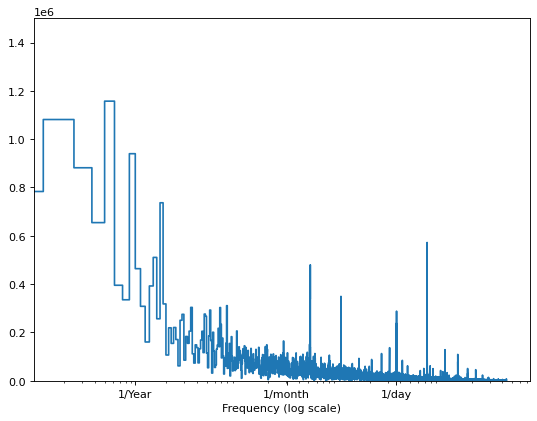

In [11]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

fft = tf.signal.rfft(df['CEI'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['CEI'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 1.5e6)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 30.4377, 365.2524], labels=['1/Year','1/month','1/day'])
_ = plt.xlabel('Frequency (log scale)')

# Split the data

In [12]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

# Normalize data

In [13]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

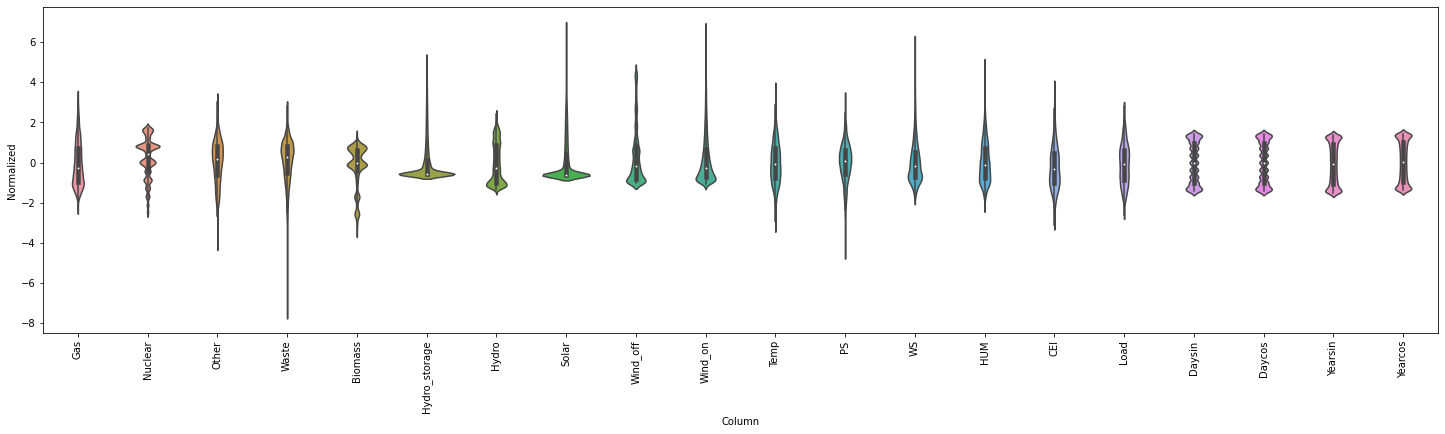

In [15]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(25, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# Data windowing

In [16]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [17]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['CEI'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['CEI']

In [18]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['CEI'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['CEI']

In [19]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [20]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 20)
Inputs shape: (3, 6, 20)
Labels shape: (3, 1, 1)


## Plot

In [21]:
w2.example = example_inputs, example_labels

In [26]:
def plot(self, model=None, plot_col='CEI', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(25, 10))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

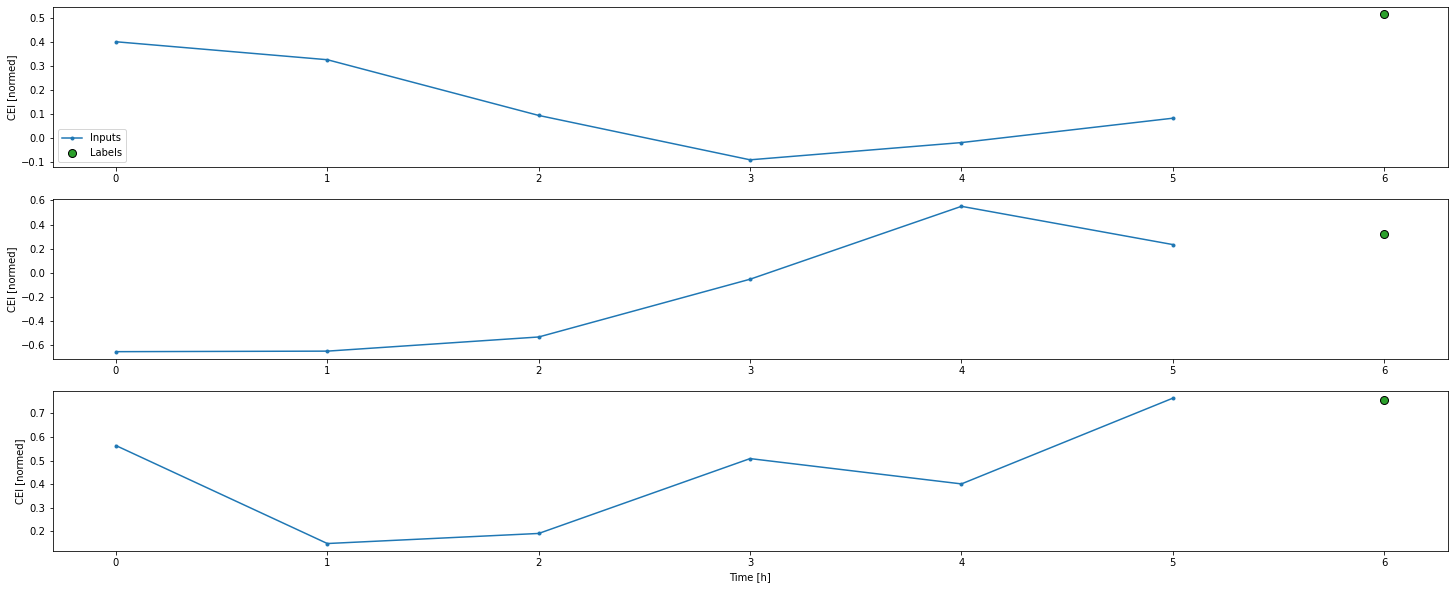

In [27]:
w2.plot()

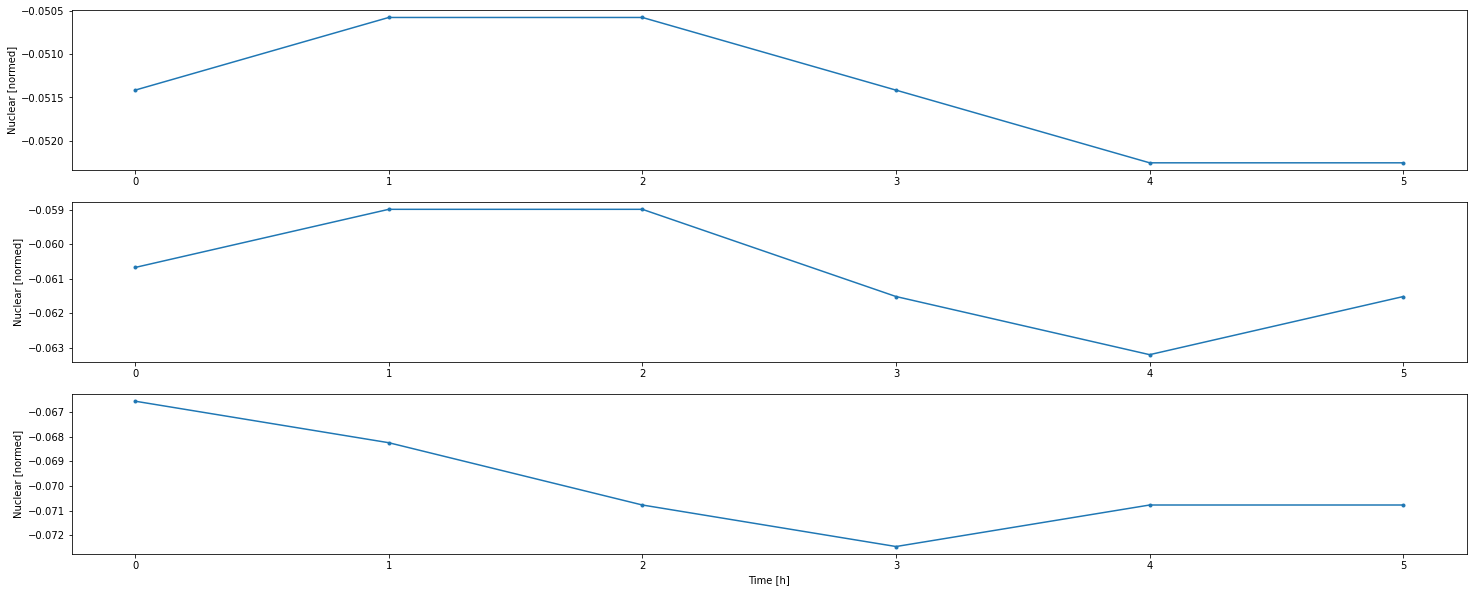

In [29]:
w2.plot(plot_col='Nuclear')

In [30]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [31]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [32]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

(TensorSpec(shape=(None, 6, 20), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [34]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 20)
Labels shape (batch, time, features): (32, 1, 1)


# Single step models

In [35]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['CEI'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['CEI']

In [36]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 20)
Labels shape (batch, time, features): (32, 1, 1)


## Baseline

In [37]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [38]:
baseline = Baseline(label_index=column_indices['CEI'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

  1/440 [..............................] - ETA: 1:59 - loss: 0.0317 - mean_absolute_error: 0.1209

2023-01-22 20:35:38.130524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


440/440 [==============================] - 2s 3ms/step - loss: 0.0593 - mean_absolute_error: 0.1738


In [39]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['CEI'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['CEI']

In [40]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 20)
Output shape: (32, 24, 1)


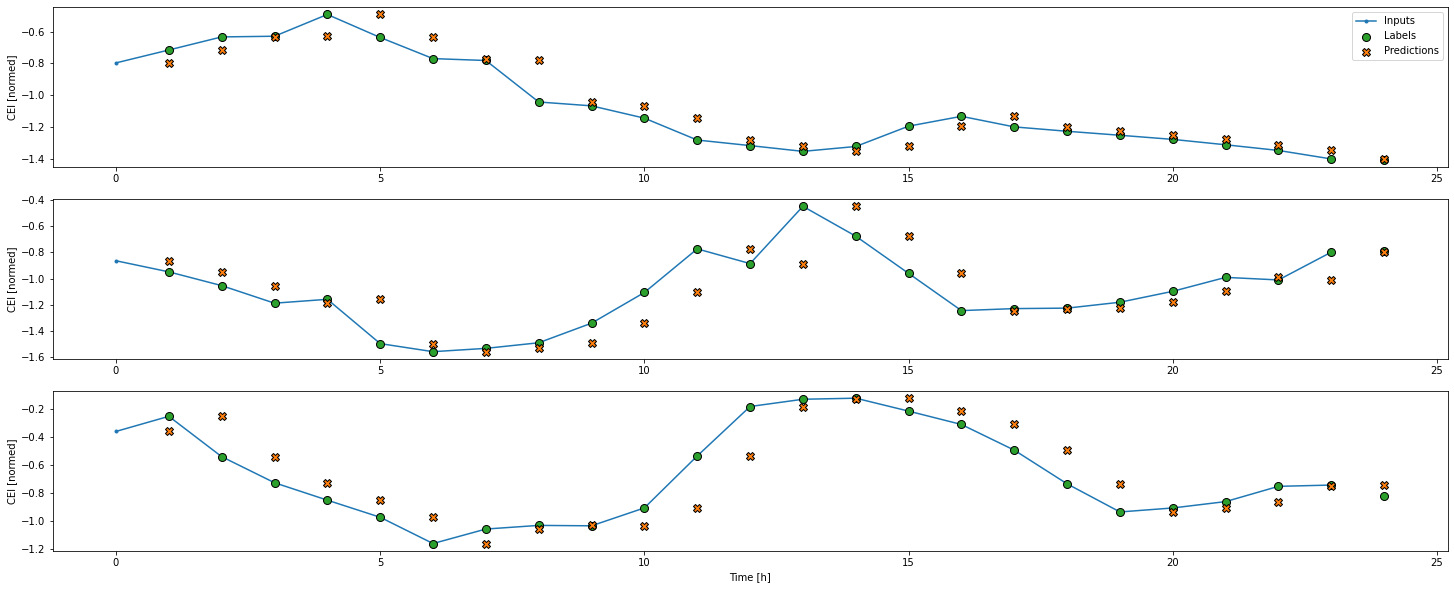

In [41]:
wide_window.plot(baseline)

## Linear model

In [42]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [43]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 20)
Output shape: (32, 1, 1)


In [44]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [45]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20


2023-01-22 20:41:27.374234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1538/1538 [==============================] - ETA: 0s - loss: 0.5602 - mean_absolute_error: 0.5156

2023-01-22 20:41:35.030680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1538/1538 [==============================] - 9s 6ms/step - loss: 0.5602 - mean_absolute_error: 0.5156 - val_loss: 0.2374 - val_mean_absolute_error: 0.3751
Epoch 2/20
1538/1538 [==============================] - 8s 5ms/step - loss: 0.0773 - mean_absolute_error: 0.2148 - val_loss: 0.1038 - val_mean_absolute_error: 0.2484
Epoch 3/20
1538/1538 [==============================] - 8s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.1774 - val_loss: 0.0680 - val_mean_absolute_error: 0.1994
Epoch 4/20
1538/1538 [==============================] - 9s 6ms/step - loss: 0.0456 - mean_absolute_error: 0.1602 - val_loss: 0.0533 - val_mean_absolute_error: 0.1720
Epoch 5/20
1538/1538 [==============================] - 9s 6ms/step - loss: 0.0431 - mean_absolute_error: 0.1540 - val_loss: 0.0499 - val_mean_absolute_error: 0.1643
Epoch 6/20
1538/1538 [==============================] - 8s 5ms/step - loss: 0.0428 - mean_absolute_error: 0.1529 - val_loss: 0.0488 - val_mean_absolute_error: 0.1623
Epoch 7/20
1538

In [46]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 20)
Output shape: (32, 24, 1)


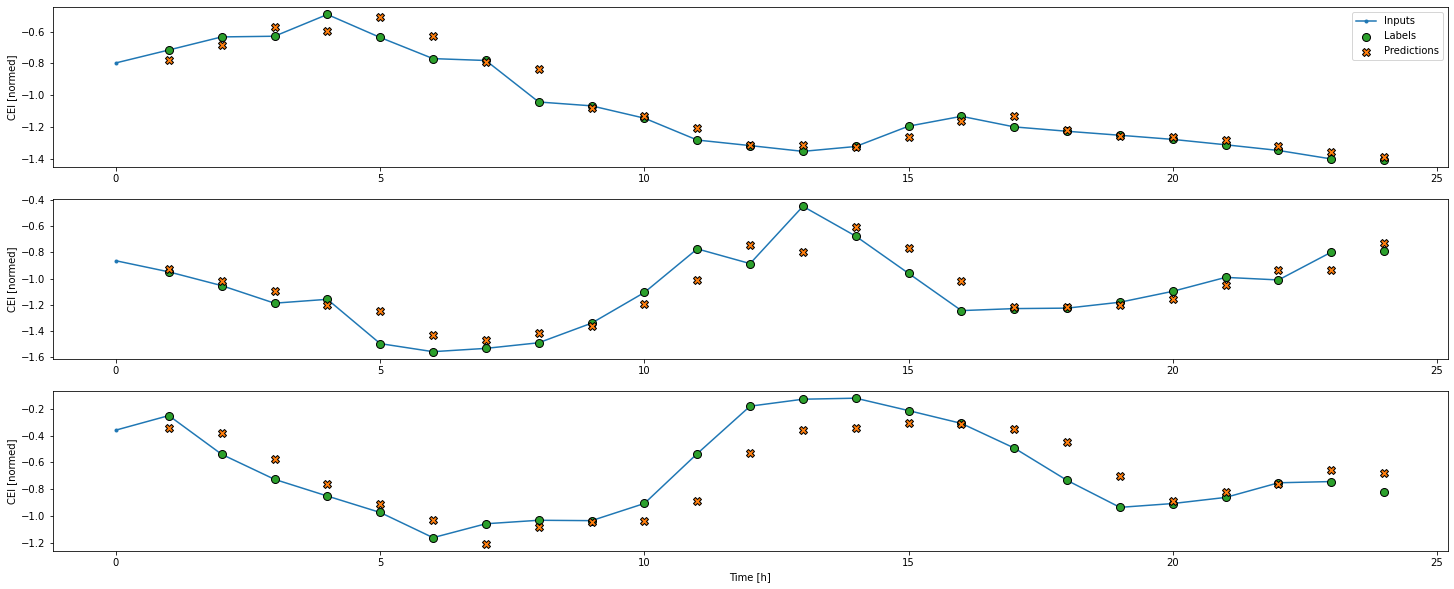

In [47]:
wide_window.plot(linear)

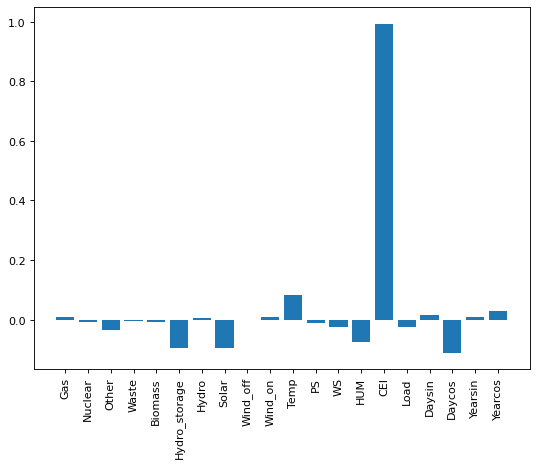

In [49]:
figure(figsize=(8, 6), dpi=80)
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## Dense

In [51]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20


2023-01-22 20:50:05.016435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1538/1538 [==============================] - ETA: 0s - loss: 0.0625 - mean_absolute_error: 0.1747

2023-01-22 20:50:17.391672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1538/1538 [==============================] - 15s 9ms/step - loss: 0.0625 - mean_absolute_error: 0.1747 - val_loss: 0.0442 - val_mean_absolute_error: 0.1578
Epoch 2/20
1538/1538 [==============================] - 15s 10ms/step - loss: 0.0333 - mean_absolute_error: 0.1373 - val_loss: 0.0418 - val_mean_absolute_error: 0.1531
Epoch 3/20
1538/1538 [==============================] - 14s 9ms/step - loss: 0.0309 - mean_absolute_error: 0.1317 - val_loss: 0.0381 - val_mean_absolute_error: 0.1465
Epoch 4/20
1538/1538 [==============================] - 14s 9ms/step - loss: 0.0298 - mean_absolute_error: 0.1287 - val_loss: 0.0388 - val_mean_absolute_error: 0.1482
Epoch 5/20
1538/1538 [==============================] - 15s 10ms/step - loss: 0.0289 - mean_absolute_error: 0.1267 - val_loss: 0.0368 - val_mean_absolute_error: 0.1445
Epoch 6/20
1538/1538 [==============================] - 14s 9ms/step - loss: 0.0283 - mean_absolute_error: 0.1252 - val_loss: 0.0363 - val_mean_absolute_error: 0.1429
Epoch 7

In [53]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['CEI'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['CEI']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

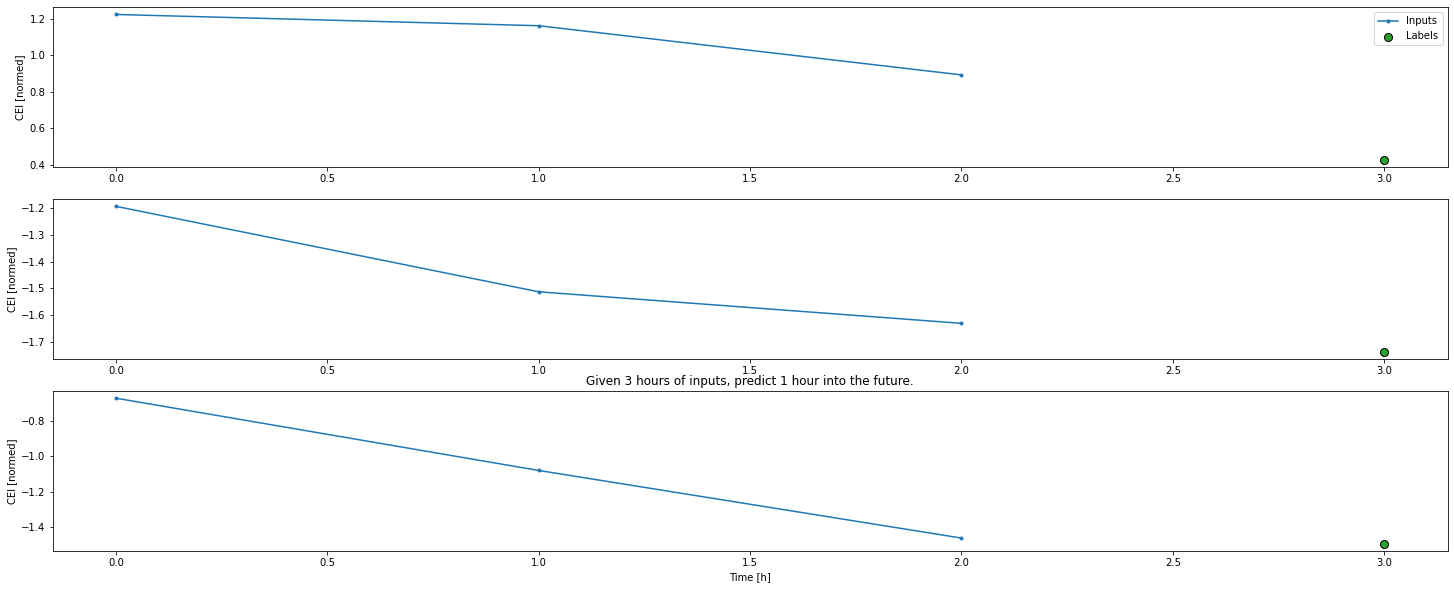

In [54]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [55]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [56]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 20)
Output shape: (32, 1, 1)


In [57]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

440/440 [==============================] - 1s 3ms/step - loss: 0.0303 - mean_absolute_error: 0.1287


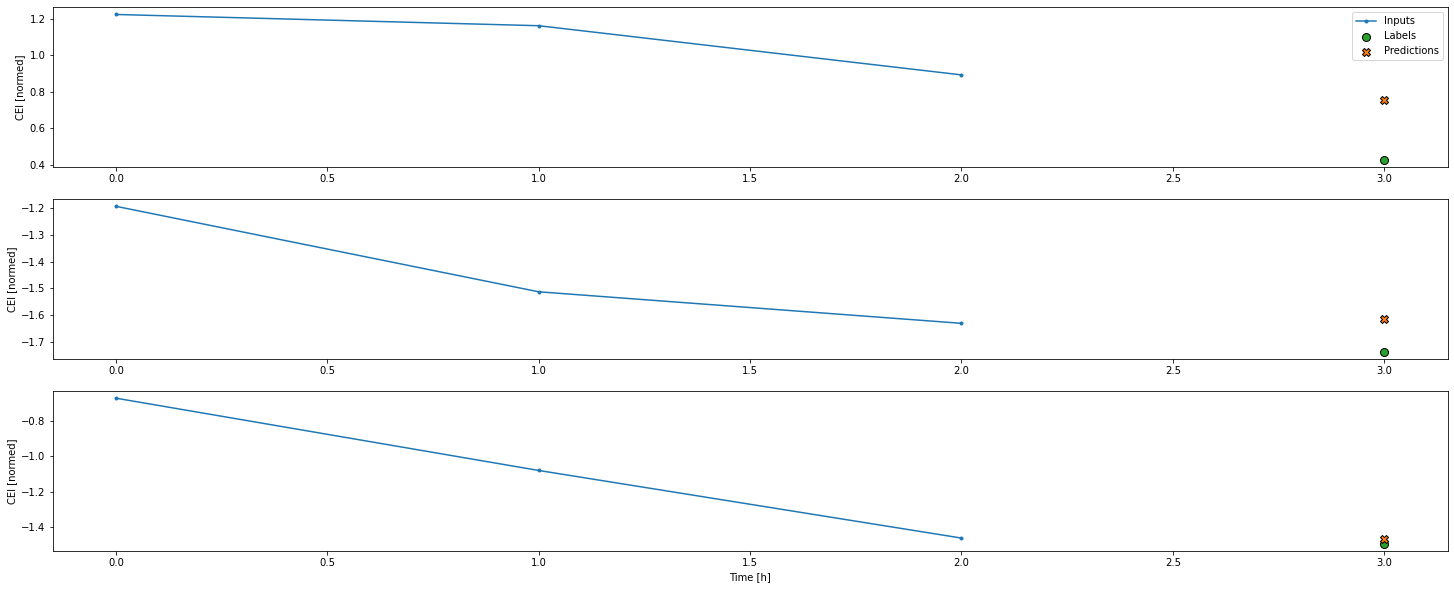

In [58]:
conv_window.plot(multi_step_dense)

In [59]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 24, 20)

ValueError:Exception encountered when calling layer "sequential_2" (type Sequential).

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 60, but received input with shape (32, 480)

Call arguments received by layer "sequential_2" (type Sequential):
  • inputs=tf.Tensor(shape=(32, 24, 20), dtype=float32)
  • training=None
  • mask=None


## CNN

In [60]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [61]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 20)
Output shape: (32, 1, 1)


In [62]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

440/440 [==============================] - 2s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.1352


In [63]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 24, 20)
Labels shape: (32, 24, 1)
Output shape: (32, 22, 1)


In [64]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['CEI'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['CEI']

In [65]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 20)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


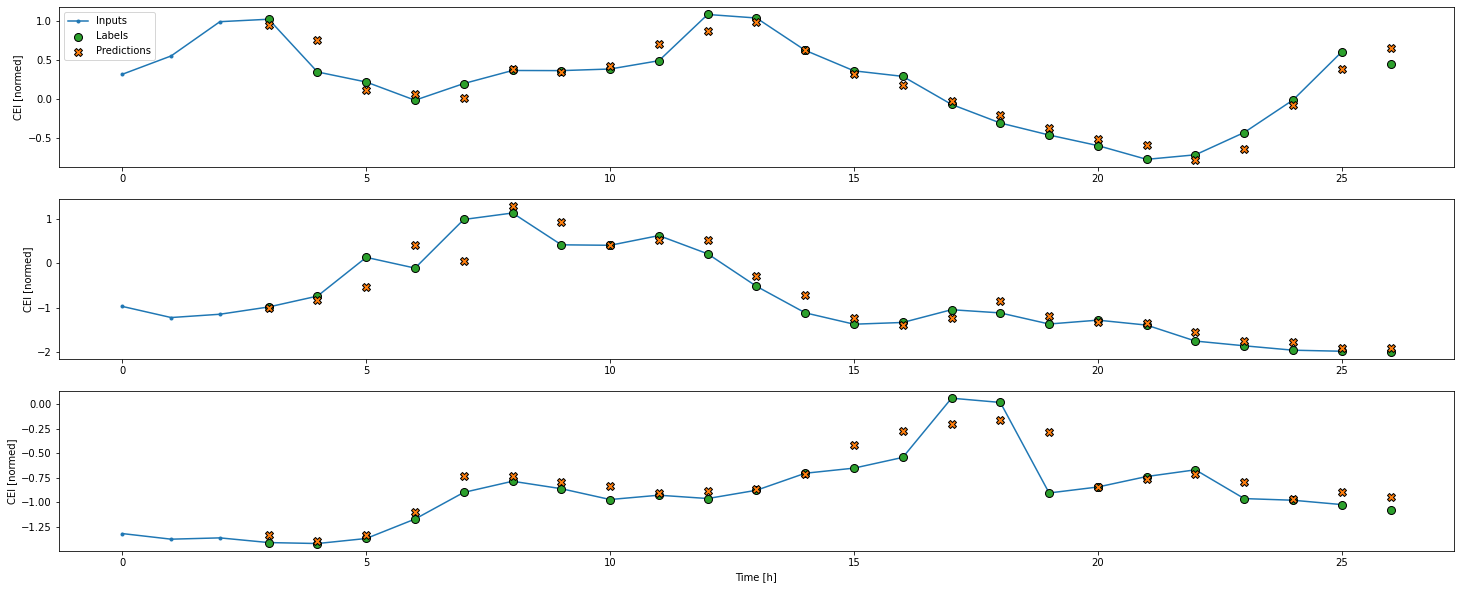

In [66]:
wide_conv_window.plot(conv_model)

## RNN

In [67]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [68]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 24, 20)
Output shape: (32, 24, 1)


In [69]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

439/439 [==============================] - 3s 8ms/step - loss: 0.0306 - mean_absolute_error: 0.1323


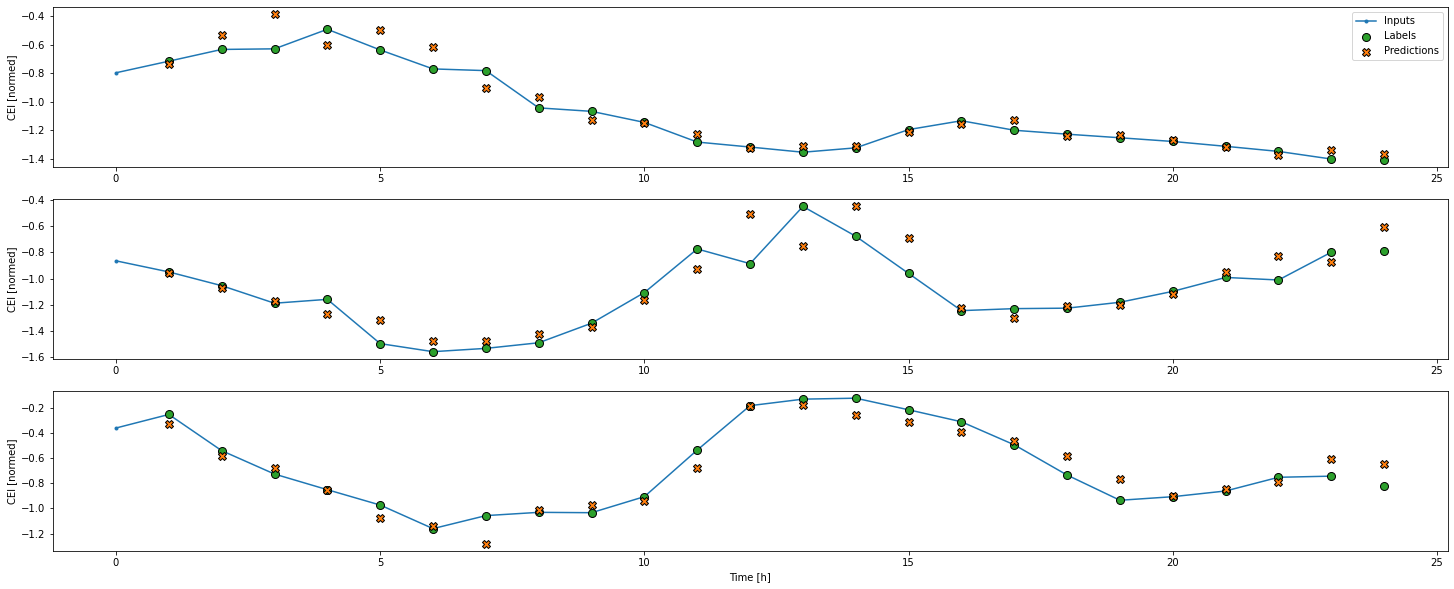

In [70]:
wide_window.plot(lstm_model)

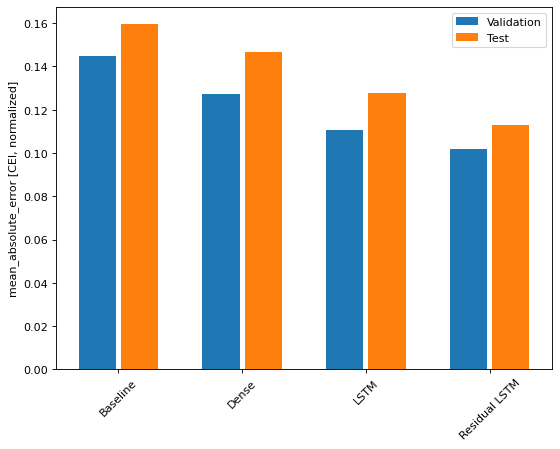

In [100]:
figure(figsize=(8, 6), dpi=80)
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [CEI, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [72]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.2075
Linear      : 0.2126
Dense       : 0.1658
Multi step dense: 0.1439
Conv        : 0.1578
LSTM        : 0.1574


# Multi-output models

In [73]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 20)
Labels shape (batch, time, features): (32, 24, 20)


In [74]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [75]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

2023-01-22 20:59:54.984657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 2s 4ms/step - loss: 0.0868 - mean_absolute_error: 0.1449


## Dense

In [76]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [77]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

440/440 [==============================] - 3s 7ms/step - loss: 0.0553 - mean_absolute_error: 0.1272


## RNN

In [78]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

439/439 [==============================] - 4s 8ms/step - loss: 0.0464 - mean_absolute_error: 0.1107

CPU times: user 4min 16s, sys: 1min 29s, total: 5min 46s
Wall time: 4min 9s


In [79]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [80]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

439/439 [==============================] - 3s 8ms/step - loss: 0.0462 - mean_absolute_error: 0.1019

CPU times: user 2min 43s, sys: 55.7 s, total: 3min 39s
Wall time: 2min 42s


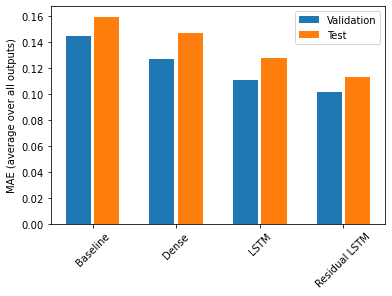

In [81]:
figure(figsize=(8, 6), dpi=80)
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_inex] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [82]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.1594
Dense          : 0.1468
LSTM           : 0.1278
Residual LSTM  : 0.1130


## Mulit-step models

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

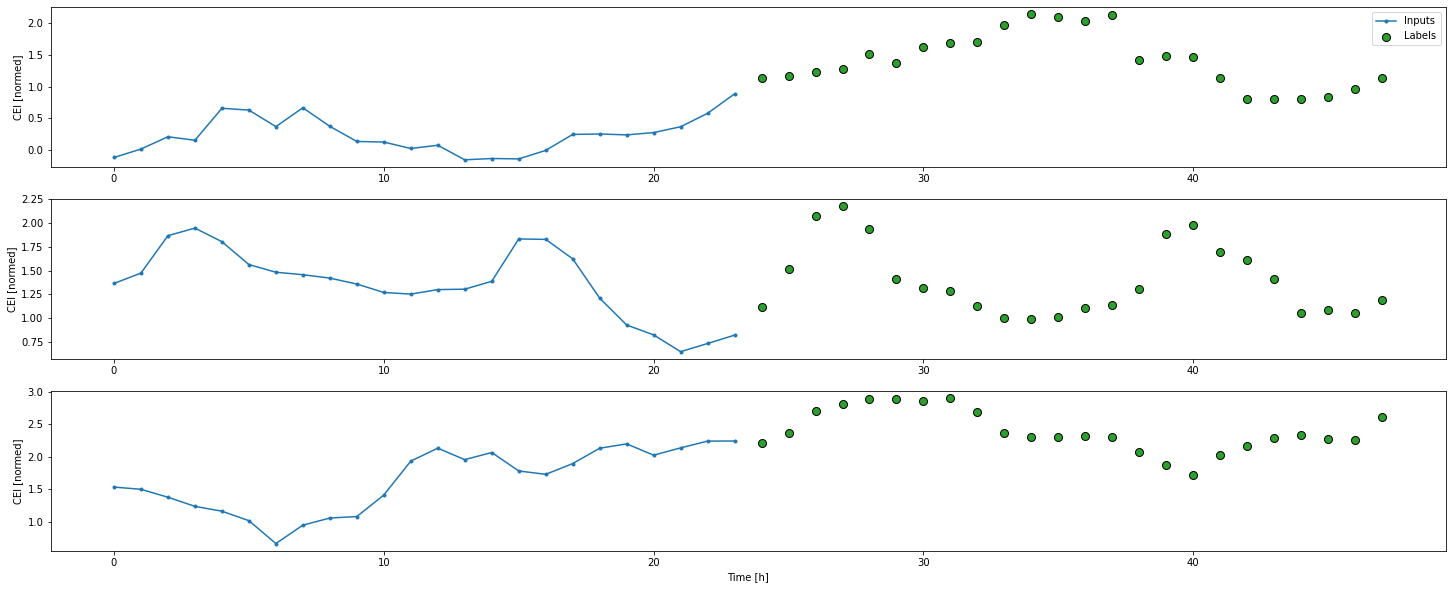

In [83]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## Baselines

2023-01-22 21:10:29.456044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


438/438 [==============================] - 2s 3ms/step - loss: 0.9143 - mean_absolute_error: 0.5589


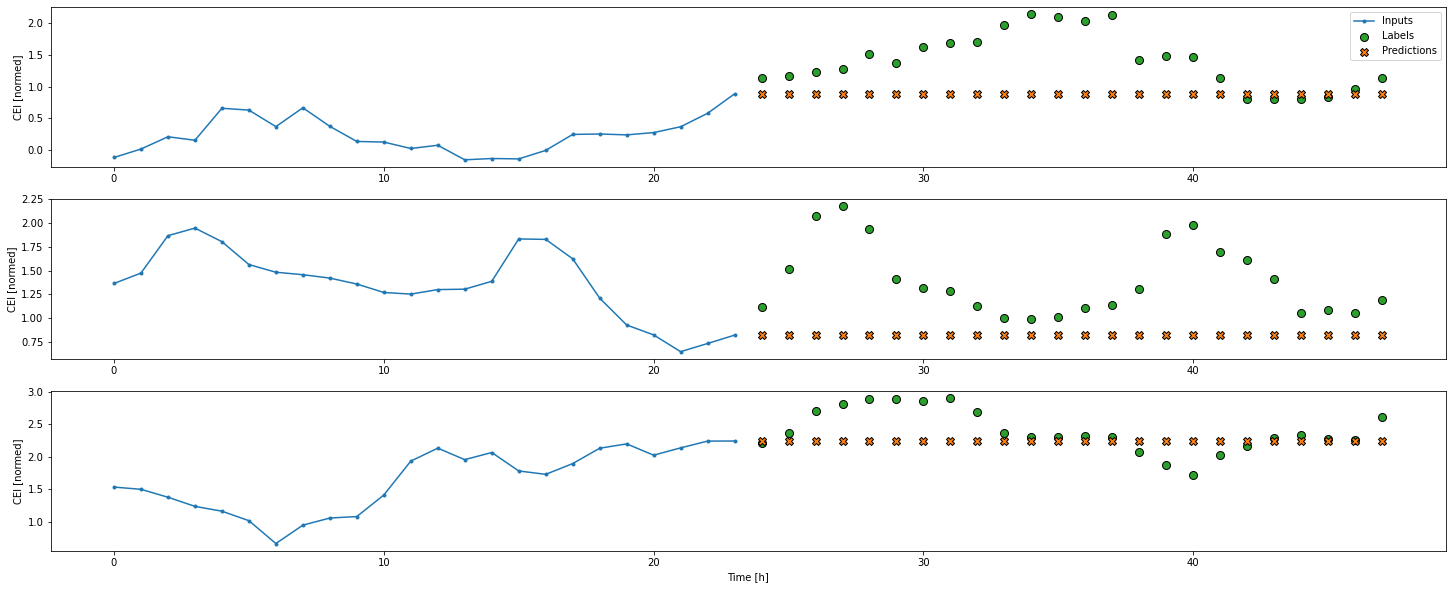

In [85]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

 44/438 [==>...........................] - ETA: 1s - loss: 0.6498 - mean_absolute_error: 0.4208

2023-01-22 21:10:31.998185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


438/438 [==============================] - 2s 3ms/step - loss: 0.6633 - mean_absolute_error: 0.4245


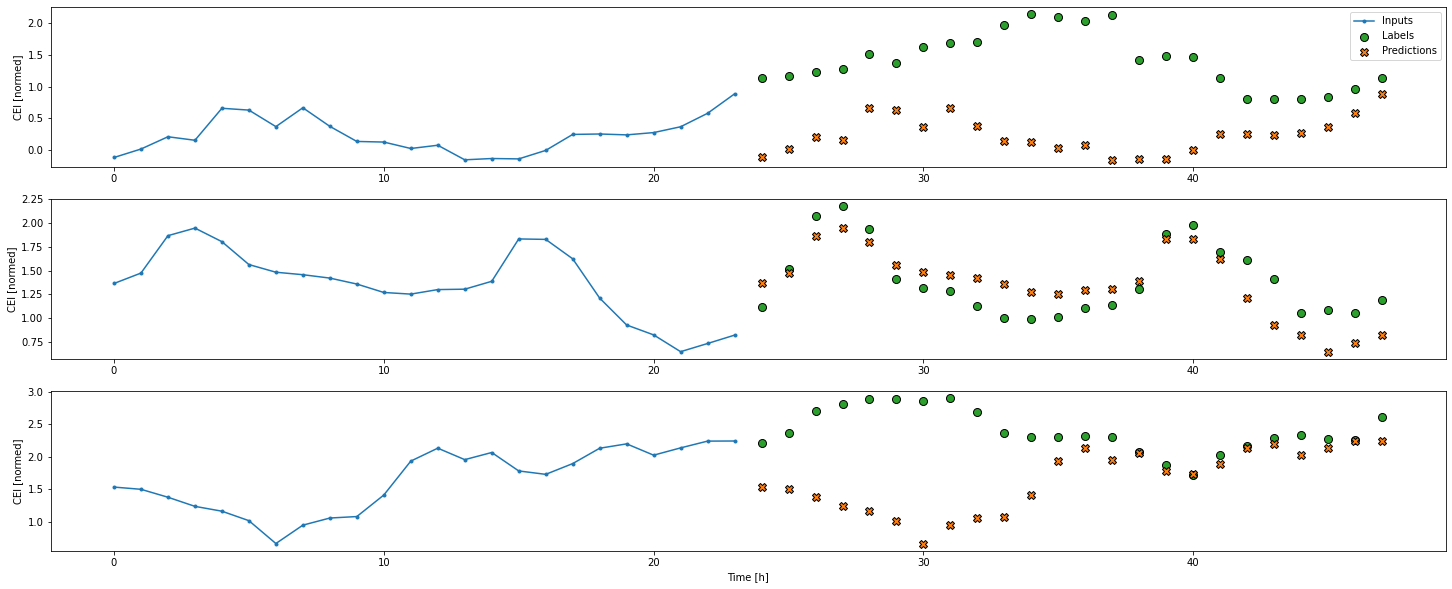

In [86]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

## Single-shot models

## Linear

438/438 [==============================] - 2s 4ms/step - loss: 0.4179 - mean_absolute_error: 0.3672


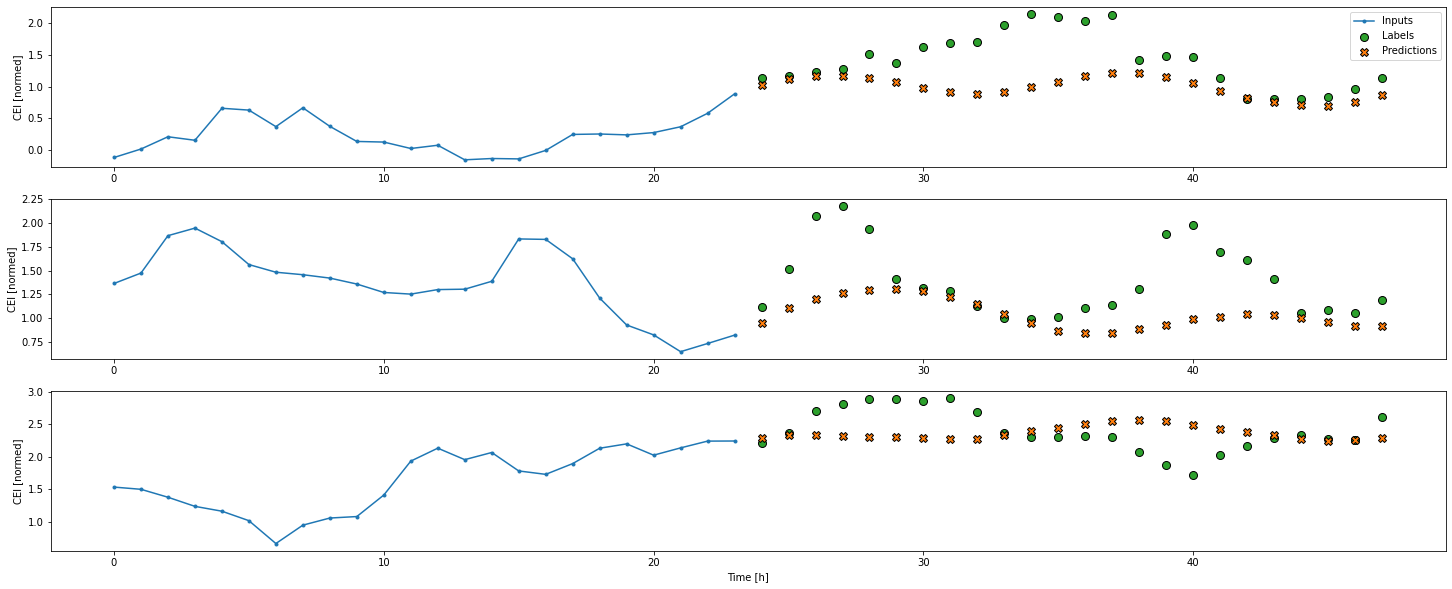

In [87]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

### Dense

438/438 [==============================] - 3s 6ms/step - loss: 0.3748 - mean_absolute_error: 0.3498


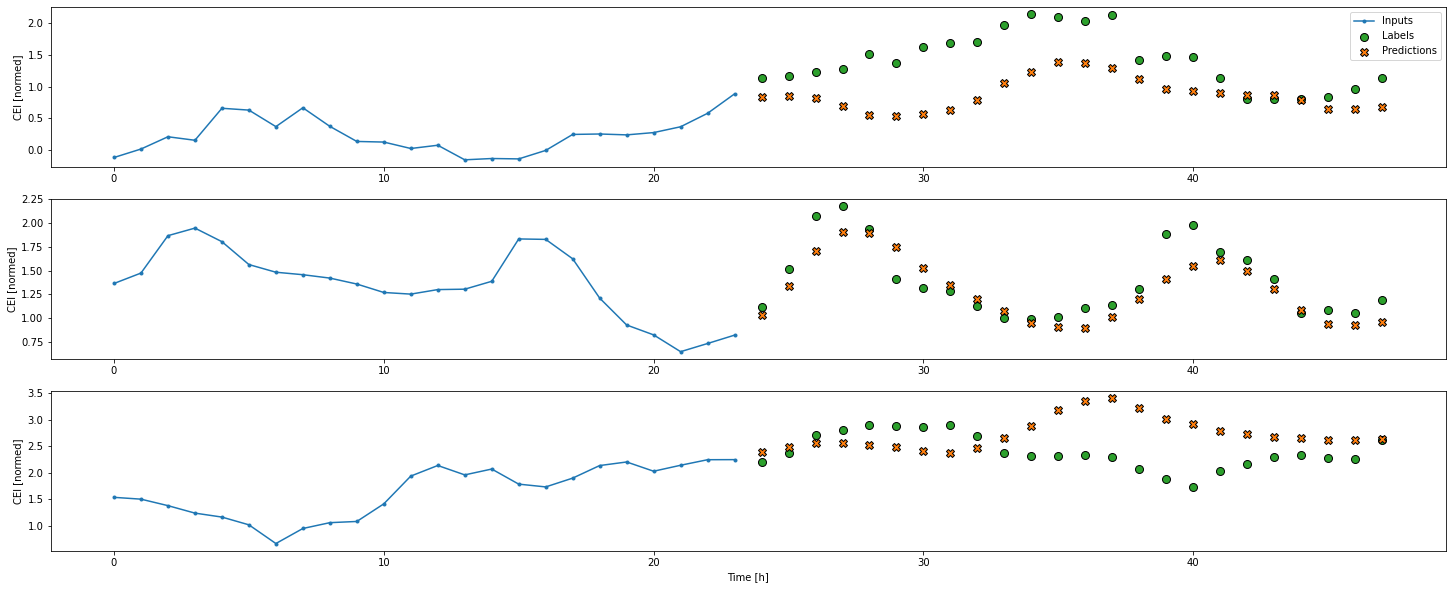

In [88]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

### CNN

438/438 [==============================] - 2s 5ms/step - loss: 0.3689 - mean_absolute_error: 0.3509


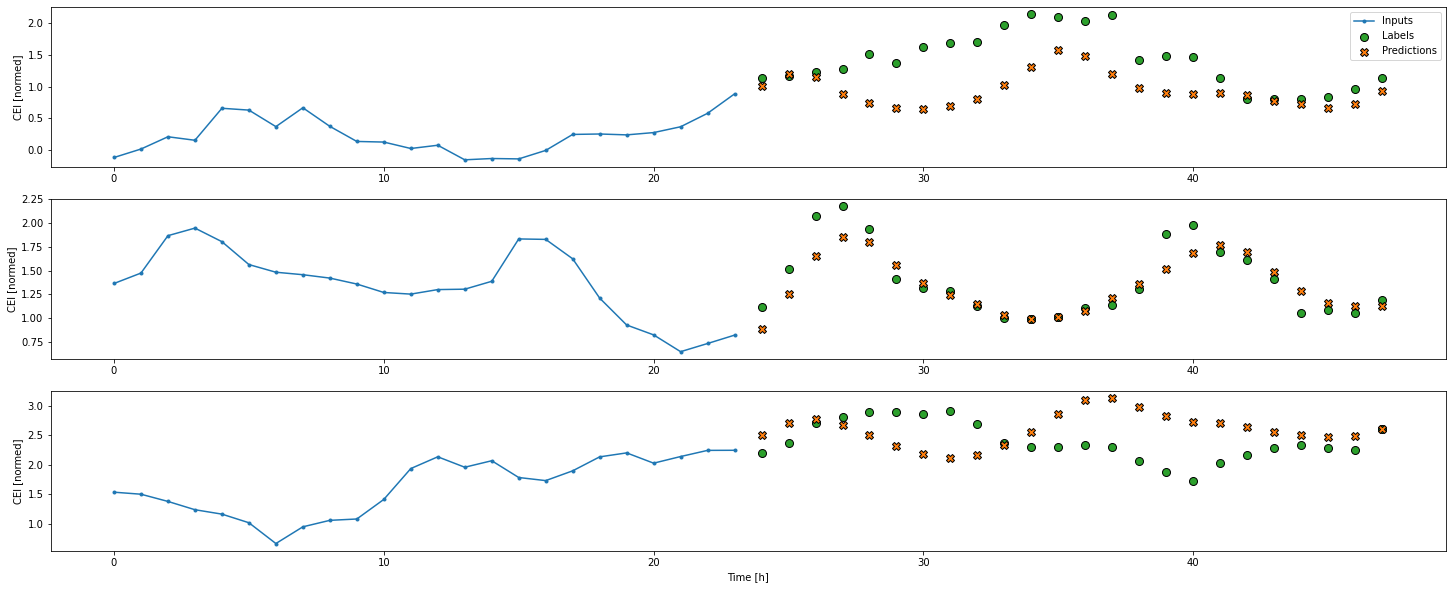

In [89]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

### RNN

438/438 [==============================] - 3s 8ms/step - loss: 0.4017 - mean_absolute_error: 0.3760


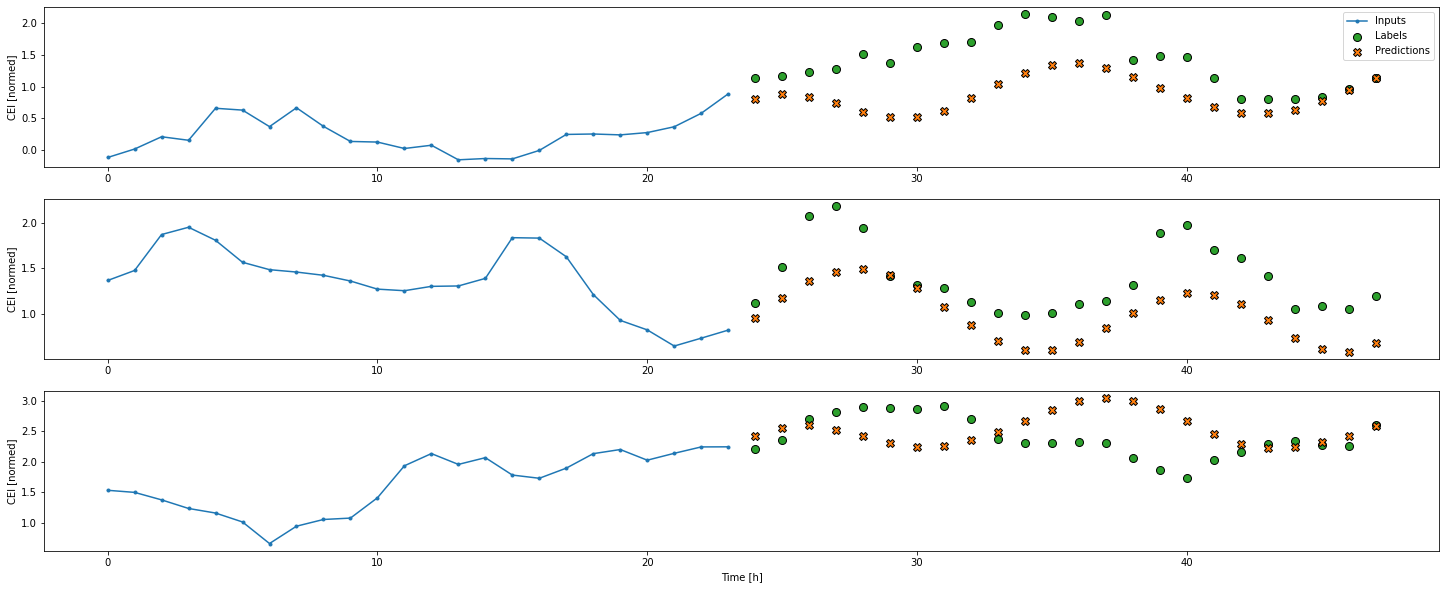

In [90]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

## Autoregressive model

### RNN

In [91]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [92]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [93]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [94]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 20])

In [95]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [96]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 24, 20)


438/438 [==============================] - 27s 61ms/step - loss: 0.4503 - mean_absolute_error: 0.4118


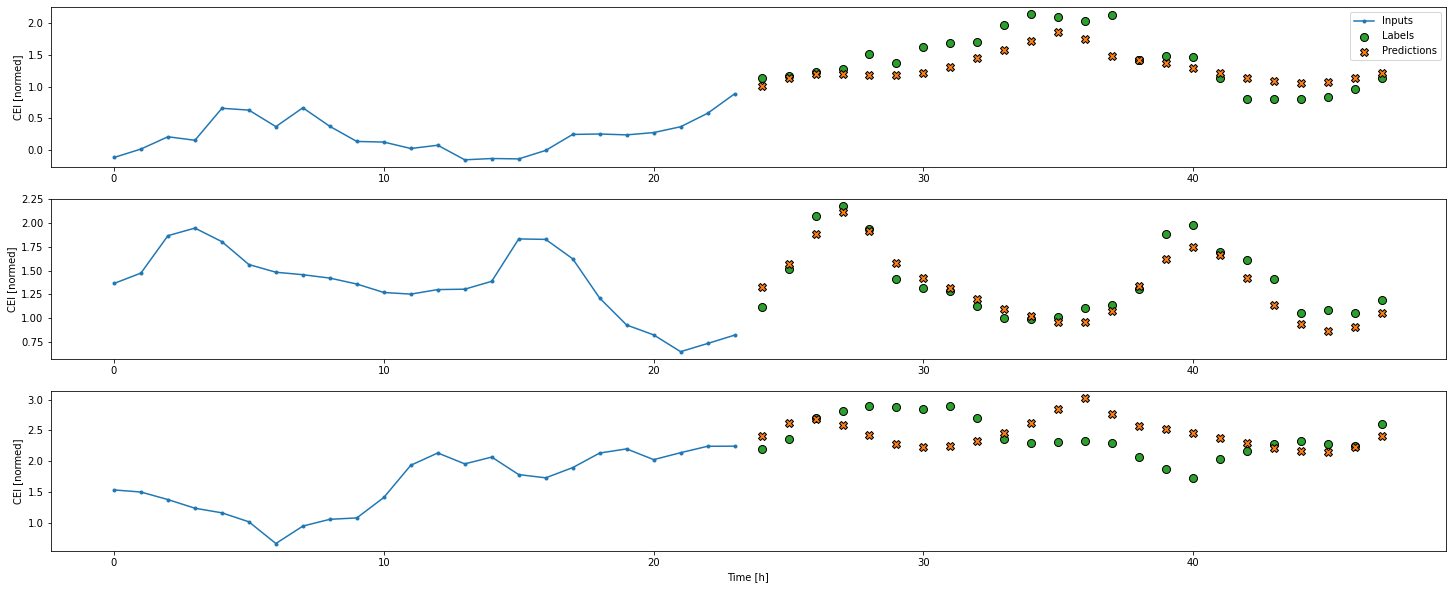

In [97]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

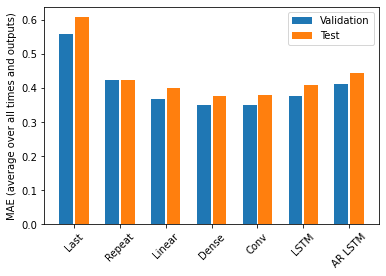

In [98]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [99]:
for name, value in multi_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.6083
Repeat  : 0.4235
Linear  : 0.3995
Dense   : 0.3755
Conv    : 0.3797
LSTM    : 0.4091
AR LSTM : 0.4455
